# 21.05.2025 - Entscheidungsbäume im Einsatz
---
In dieser Unterrichtseinheit widmen wir uns dem praktischen Einsatz von Entscheidungsbäumen. Entscheidungsbäume sind ein Modell in der Künstlichen Intelligenz, das Daten anhand von Entscheidungsregeln in Form von Wenn-Dann-Bedingungen schrittweise klassifiziert oder vorhersagt.
Zunächste wiederholen wir Essentielles zum Thema Entscheidungsbäume: Die Bedeutung von Trainingsdaten und ihr Zusammenhang zum Aufbau eines Entscheidungsbaumens. Danach erstellen wir bereits ein erstes Python Programm, das alle notwendigen Schritte zur Nutzung von Entscheidungsbäumen als Vorhersagemodell enthält. Fortgeführt wird das Thema mit realitätsnahen Anwendungen.

* Zur Bearbeitung der Aufgaben können Sie benötigte Informationen zu Python-Befehlen und zu KI relevanten Bibliotheken (numpy, scikit, pandas) aus allen verfügbaren Quellen beziehen. Die meisten findet man natürlich über eine Suche im Internet, oder durch die Nutzung von KI chat-Systemen selbst.
Ein gutes Tutorial für den Start findet sich  z.B. hier: https://www.python-kurs.eu/numerisches_programmieren_in_Python.php

## Phase I Wiederholung zum Einstieg in Entscheidungsbäume

### Struktur und Klassifizierungsweise des Entscheidungsbaumes

<img src="./PythonGrundlagen_023_Bilder/Entscheidungsbaum_Fahrzeuge.drawio.png" alt="Diagramm" width="550" />

(Denken Sie an Ihr Programm aus verschachtelten *if*-Bedingungen)

#### Baumstruktur

Ein *(Entscheidungs-)baum* besteht aus
- *Knoten*:  
Jeder innere Knoten enthält eine *Verzweigungsbedingung (Split*).  
Jeder Knoten repräsentiert eine Teilmenge des Merkmalraumes.
- *Verzweigungen*:  
Verbindungen von einem Knoten zu mehreren anderen Knoten (meist zwei).

Bei den Knoten unterscheidet man zwischen
- *Wurzelknoten (Root)*: Einziger Knoten, in den keine Verzweigung mündet.
- *Innere Knoten (Decision nodes)*: Haben ausgehende Verzweigungen.
- *Blätter (Leaf nodes)*: Knoten, die keine weiteren Verzweigungen haben. **Sie enthalten die Vorhersage (z.B. Klasse).**

#### Wie ein Entscheidungsbaum eine Klasse vorhersagt

Ein Entscheidungsbaum trifft Vorhersagen, indem er schrittweise die Knoten des Baumes entlangläuft. Der Pfad wird dabei durch die Merkmale und die Split-Kriterien der Knoten vorgegeben.

1. Start an der Wurzel  
Der Entscheidungsprozess beginnt am Wurzelknoten des Baums. Dieser enthält eine Bedingung, die sich auf den Wert eines Merkmals bezieht (z. B. "Gewicht < 1000").

2. Verzweigung abhängig vom Merkmal  
Abhängig vom Ergebnis der Bedingung (wahr oder falsch) wird entweder der linke oder der rechte Teilbaum betreten.  
Dabei wird üblicherweise jeweils nur ein einzelnes Merkmal geprüft.

3. Wiederholung bis zum Blattknoten  
Dieser Vorgang wird rekursiv wiederholt: An jedem Knoten wird eine neue Bedingung auf einem Merkmal geprüft, bis schließlich ein Blattknoten erreicht wird.

4. Ausgabe der Klasse  
Im Blattknoten steht die vorhergesagte Klasse (z. B. "Kleinwagen"). Diese wird als Vorhersage für den gegebenen Datenpunkt ausgegeben.

### Daten eines Entscheidungsbaums
 
Ein *Entscheidungsbaum* sagt anhand von Werten für eine feste Menge an *Merkmalen (Features)* eine *Zielgröße (Label)* voraus. 

Alle Daten, auf denen der Entscheidungsbam basiert und für die er Vorhersagen trifft, haben die selbe Struktur:

- **Merkmale** (z.B. Größe, Gewicht, Höchstgeschwindigkeit).
  - Typen der Merkmale: numerisch, kategorial.
  - Die Reihenfolge der Merkmale muss immer gleich sein und identisch mit der vom Entscheidungsbaum genutzten Reihenfolge.

  Beispiel (ein neues Fahrzeug zur Klassifikation, 3 Merkmale):

  | Gewicht (kg) | Farbe | Geschwindigkeit (km/h) |
  |--------------|-------|------------------------|
  | 950          | rot   | 175                    |  

<span> </span>


- **Zielgröße** (z.B.Vorhergesagte Klasse).
  - Die Werte in Klassifizierung stammen aus einer **festen endlichen Menge von labels**, z. B.:
  - Der Entscheidungsbaum ordnet jedem Eingabeobjekt genau **eine Klasse** zu
  - In Anwendungen können die Klassen auch durch Zahlen (z. B. 0, 1, 2, 3) repräsentiert sein

  Beispiel (Fahrzeugklassen):

  | Klassifizierung |
  |----------------------|
  | Kleinwagen           |
  | Kleintransporter     |
  | Sportwagen           |

**Für die neuen/unbekannten Daten, für die eine Vorhersage getroffen werden soll, liegen offensichtlich zunächst keine Zielgrößen vor.**

### Erstellen eines Entscheidungsbaumes

#### Konzept eines Entscheidungsbaumes

Die zentrale Idee:  
Ein Entscheidungsbaum trifft Entscheidungen durch eine sukzessive Zerlegung des Merkmalsraums.


In [ ]:
# -------------------------------
# Beispiel für einen Markmalsraum
# -------------------------------

import matplotlib.pyplot as plt
import numpy as np

# Plot erzeugen
plt.figure(figsize=(8, 6))

# Plotbereich setzen
plt.xlim(0, 3000)
plt.ylim(100, 300)

# Farbige Regionen zeichnen mit plt.fill_between bzw. plt.axhspan / plt.axvspan

# Klasse A: Kleinwagen (x < 1000 und y < 180)
plt.fill_betweenx(y=[100, 180], x1=0, x2=1000, color='blue', alpha=0.2, label='Kleinwagen')

# Klasse B: Sportwagen (x < 1000 und y >= 180)
plt.fill_betweenx(y=[180, 300], x1=0, x2=1000, color='red', alpha=0.2, label='Sportwagen')

# Klasse C: Kleintransporter (x >= 1000 und y < 150)
plt.fill_betweenx(y=[100, 150], x1=1000, x2=3000, color='green', alpha=0.2, label='Kleintransporter')

# Klasse D: Premium-SUV/Limousine (x >= 1000 und y >= 150)
plt.fill_betweenx(y=[150, 300], x1=1000, x2=3000, color='orange', alpha=0.2, label='Premium-SUV/Limousine')

# Klassengrenzen
plt.axvline(x=1000, color='gray', linestyle='--', linewidth=2.5)
plt.hlines(y=180, xmin=0, xmax=1000, color='gray', linestyle='--', linewidth=2.5)
plt.hlines(y=150, xmin=1000, xmax=3000, color='gray', linestyle='--', linewidth=2.5)

# Achsenbeschriftung, Titel, Legende
plt.xlabel('Gewicht (kg)')
plt.ylabel('Höchstgeschwindigkeit (km/h)')
plt.title('Merkmalsraum mit farblich markierter Zerlegung (Beispiel)')
plt.legend()
plt.grid(True)
plt.show()


#### Aufbau des Baums

Damit der Entscheidungsbaum die o.g. zentrale Idee umsetzen kann, muss für jeden Knoten (außer Blätter) klar definiert sein:
- Auf welches Merkmal bezieht sich der Split eines Knotens
- Welche Relation nutzt der Split
- Auf welchen Grenzwert bezieht sich der Split

Aus den Splits der Knoten ergibt sich die komplette Baumstruktur inklusive Anzahl und Anordnung aller Knoten.



##### -> Die optimale Definition der Splits kann berechnet werden. Und Python übernimmt das für uns.

##### Aber auf welcher Basis?

Auf Basis der *Trainingsdaten*.

Trainingsdaten sind strukturierte Datensätze, die aus Eingabemerkmalen (Features) und den bekannten, dazugehörigen Zielwerten (Labels oder Klassen) bestehen.

Die Struktur des Entscheidungsbaumes – also welche Merkmale in welcher Reihenfolge abgefragt werden und wo die Grenzen verlaufen – wird direkt aus ihnen abgeleitet.

Der Wahrheitsgehalt der Trainingsdaten ist dabei entscheidend: Die enthaltenen Merkmale und Klassenlabels gelten als korrekt (*Ground Truth*). Fehlerhafte oder verzerrte Daten können zu einem fehlerhaften Modell führen, das falsche oder verzerrte Vorhersagen trifft.
Die Qualität und Repräsentativität der Trainingsdaten beeinflusst somit maßgeblich die Güte der späteren Klassifikationen.


### Zusammengefasst

#### Sortieren wir die folgenden Begriffe. Was ergibt sich woraus?

- Trainingsdaten
- Vorhersage
- Neue Daten
- Entscheidungsbaum
- Merkmale
- Zielwerte


## Phase II - Hands-on

### 1. Aufgabe: Eine Klassifizierung durchführen - vom Aufbau des Baumes bis zur Entscheidungsfindung

In dieser Aufgabe soll ein vollständiges Programm zur Klassifizierung mittels Entscheidungsbaum programmiert werden. 

Als Anwendungsfall dient die Klassifikation von Fahrzeugen anhand ihres Gewichts und ihrer Geschwindigkeit.  
Gegeben seien die folgenden Daten, von denen eine korrekte Klassifizierung bereits bekannt ist:

| Gewicht (kg) | Höchstgeschwindigkeit (km/h) | Klasse                 |
|--------------|------------------------------|------------------------|
| 800          | 160                          | Kleinwagen             |
| 900          | 170                          | Kleinwagen             |
| 950          | 175                          | Kleinwagen             |
| 900          | 200                          | Sportwagen             |
| 950          | 220                          | Sportwagen             |
| 750          | 290                          | Sportwagen             |
| 1100         | 140                          | Kleintransporter       |
| 1200         | 145                          | Kleintransporter       |
| 1300         | 130                          | Kleintransporter       |
| 1200         | 190                          | Premium-SUV/Limousine  |
| 1500         | 180                          | Premium-SUV/Limousine  |
| 2600         | 170                          | Premium-SUV/Limousine  |


1. Erstellen Sie für die Tabelle ein Pandas DataFrame.

2. Informieren Sie sich, wie mit dem Python Paket *sklearn* eine Klassifizierung mittels Entscheidungsbaumes programmiert wird.

3. Schreiben Sie ein Python Programm, in dem die Klassifizierung mittels Entscheidungsbaumes für das Beispiel der Fahrzeugklassen umgesetzt wird.
   - Trainieren Sie den Entscheidungsbaum mit den Daten aus dem DataFrame
   - Lassen Sie den Entscheidungsbaum für einen beliebigen neuen Datenpunkt eine Vorhersage der Klasse machen

4. Testen Sie die Vorhersage anhand unterschiedlicher neuer Datenpunkte.


Vorhersage für den neuen Datenpunkt: ['Kleintransporter' 'Sportwagen' 'Premium-SUV/Limousine']
   Gewicht (kg)  Höchstgeschwindigkeit (km/h)             Vorhersage
0          1500                           100       Kleintransporter
1           700                           200             Sportwagen
2          1200                           180  Premium-SUV/Limousine


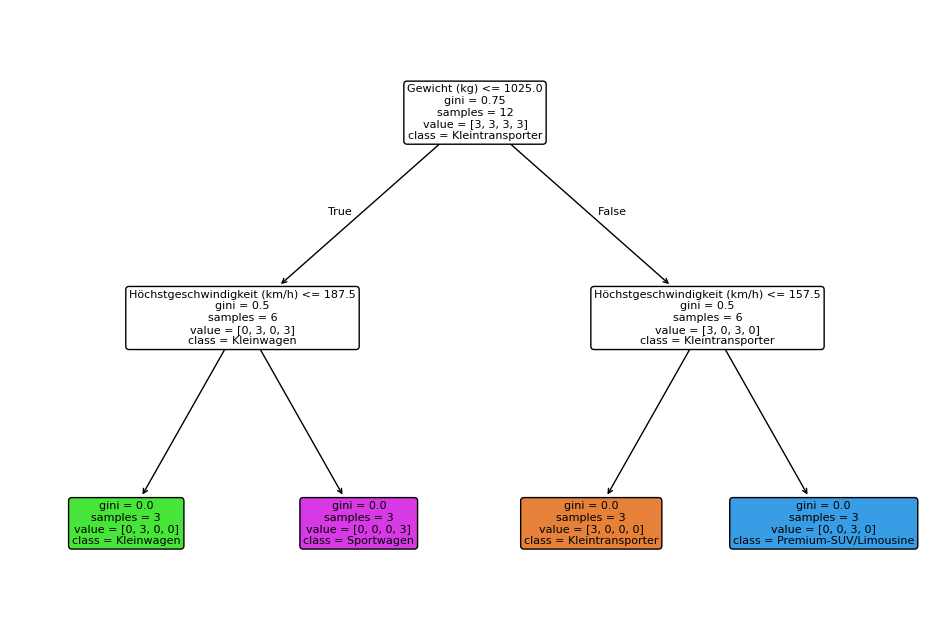

['Kleintransporter' 'Kleinwagen' 'Premium-SUV/Limousine' 'Sportwagen']


In [64]:
# Module importieren
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt   


# Tabellendaten als DataFrame
daten = [
    {"Gewicht (kg)": 800, "Höchstgeschwindigkeit (km/h)": 160, "Klasse": "Kleinwagen"},
    {"Gewicht (kg)": 900, "Höchstgeschwindigkeit (km/h)": 170, "Klasse": "Kleinwagen"},
    {"Gewicht (kg)": 950, "Höchstgeschwindigkeit (km/h)": 175, "Klasse": "Kleinwagen"},
    {"Gewicht (kg)": 900, "Höchstgeschwindigkeit (km/h)": 200, "Klasse": "Sportwagen"},
    {"Gewicht (kg)": 950, "Höchstgeschwindigkeit (km/h)": 220, "Klasse": "Sportwagen"},
    {"Gewicht (kg)": 750, "Höchstgeschwindigkeit (km/h)": 290, "Klasse": "Sportwagen"},
    {"Gewicht (kg)": 1100, "Höchstgeschwindigkeit (km/h)": 140, "Klasse": "Kleintransporter"},
    {"Gewicht (kg)": 1200, "Höchstgeschwindigkeit (km/h)": 145, "Klasse": "Kleintransporter"},
    {"Gewicht (kg)": 1300, "Höchstgeschwindigkeit (km/h)": 130, "Klasse": "Kleintransporter"},
    {"Gewicht (kg)": 1200, "Höchstgeschwindigkeit (km/h)": 190, "Klasse": "Premium-SUV/Limousine"},
    {"Gewicht (kg)": 1500, "Höchstgeschwindigkeit (km/h)": 180, "Klasse": "Premium-SUV/Limousine"},
    {"Gewicht (kg)": 2600, "Höchstgeschwindigkeit (km/h)": 170, "Klasse": "Premium-SUV/Limousine"},
]

# Nikitas Version für die Daten
data = {
        "Gewicht (kg)": [800, 900, 950, 900, 950, 750, 1100, 1200, 1300, 1200, 1500, 2600],
        "Höchstgeschwindigkeit (km/h)": [160, 170, 175, 200, 220, 290, 140, 145, 130, 190, 180, 170],
        "Klasse": ["Kleinwagen", "Kleinwagen", "Kleinwagen", "Sportwagen", "Sportwagen", "Sportwagen",
                  "Kleintransporter", "Kleintransporter", "Kleintransporter", "Premium-SUV/Limousine",
                    "Premium-SUV/Limousine", "Premium-SUV/Limousine"]
}

df = pd.DataFrame(daten)


# Einen Klassifizierungsbaum trainieren

    # Feature-Spalten und Zielvariable definieren
feature_cols = ['Gewicht (kg)', 'Höchstgeschwindigkeit (km/h)']
X = df[feature_cols] # Features
y = df.Klasse # Target variable

    # Klassifizierungsbaum erstellen
baum = DecisionTreeClassifier()

    # Klassifizierungsbaum trainieren
baum.fit(X, y)


# Einen neuen Datenpunkt mit seinen Merkmalen definieren und als Dataframe formatieren
neue_datenpunkte = pd.DataFrame(
    {
        "Gewicht (kg)": [1500,700,1200],
        "Höchstgeschwindigkeit (km/h)": [100,200,180]
    }
)

# Vorhersage für neue Datenpunkte mittels Entscheidungsbaum
vorhersage = baum.predict(neue_datenpunkte)
print(f"Vorhersage für den neuen Datenpunkt: {vorhersage}")
neue_datenpunkte['Vorhersage'] = vorhersage
print(neue_datenpunkte)

# Plot des Entscheidungsbaums
plt.figure(figsize=(12, 8))
plot_tree(baum, feature_names=feature_cols, class_names=baum.classes_, filled=True, rounded=True)
plt.show()

print(baum.classes_)

### 2. Aufgabe: Analyse des Entscheidungsbaums

Der Baum kann in Python direkt grafisch ausgegeben werden! 

Lassen Sie sich Ihren erzeugten Baum ausgeben.
Informieren Sie sich über die Bedeutung der angezeigten Informationen.  

In [ ]:
# Oben hinzugefügt

### 3. Aufgabe: Visualisierung

Plotten Sie mit mathplotlib ein 2-dimensionales Diagramm, mit Gewicht als x-Achse und Höchstgeschwindigkeit als y-Achse.
Zeichnen Sie die Zerlegung des Merkmalsraumes ein, so wie sie der Entscheidungsbaum aus Aufgabe 1 vornimmt.
Fügen Sie auch die Trainingsdaten aus Aufgabe 1 als Datenpunkte in Ihr Diagramm ein.


In [ ]:
# Module importieren
# To whom it may concern

# Datenpunkte 

# Plot erzeugen



Rückblick: In der vorangegangenen Unterrichtseinheit haben wir zu Beginn folgende Werte genutzt um die Fahrzeugklassen zu unterscheiden:

| Klasse                  | Gewicht (kg)            | Höchstgeschwindigkeit (km/h) |
|-------------------------|-------------------------|-------------------------------|
| Kleinwagen          | < 1000                  | < 180                         |
| Sportwagen          | < 1000                  | ≥ 180                         |
| Kleintransporter    | ≥ 1000                  | < 150                         |
| Premium-SUV         | ≥ 1000                  | ≥ 150                         |

Warum hat der tatsächliche Entscheidungsbaum nun andere Grenzwerte?

### 4. Aufgabe - Klassifikation der Schwertlilien mit einem Entscheidungsbaum

<img src="./PythonGrundlagen_023_Bilder/iris_flower_magnifying_glass.webp" alt="Diagramm" width="550" />

Schreiben Sie ein Python-Programm, das die berühmten *Schwertlilien-Daten (Iris-Datensatz)* mithilfe eines Entscheidungsbaums klassifiziert.
Trainieren Sie dazu ein Entscheidungsbaum-Modell auf dem Iris-Datensatz, um die drei Iris-Arten (Setosa, Versicolor, Virginica) anhand ihrer Merkmale zu unterscheiden. Der Datensatz liegt vor in der Datei iris.csv.

#### Schritte:
1. Laden Sie den Iris-Datensatz in ein DataFrame.
2. Trainieren Sie einen Entscheidungsbaum mit den Merkmalsdaten und den zugehörigen Klassenlabels.
3. Testen Sie das Modell. Treffen Sie mit seiner Hilfe Vorhersagen durch einzelne Beispieldatenpunkte.

*Variante:* Trainieren Sie den Entscheidungsbaum nur mit einem Teil des Iris-Datensatzes, und testen Sie das Modell dann an den übrigen Daten.



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


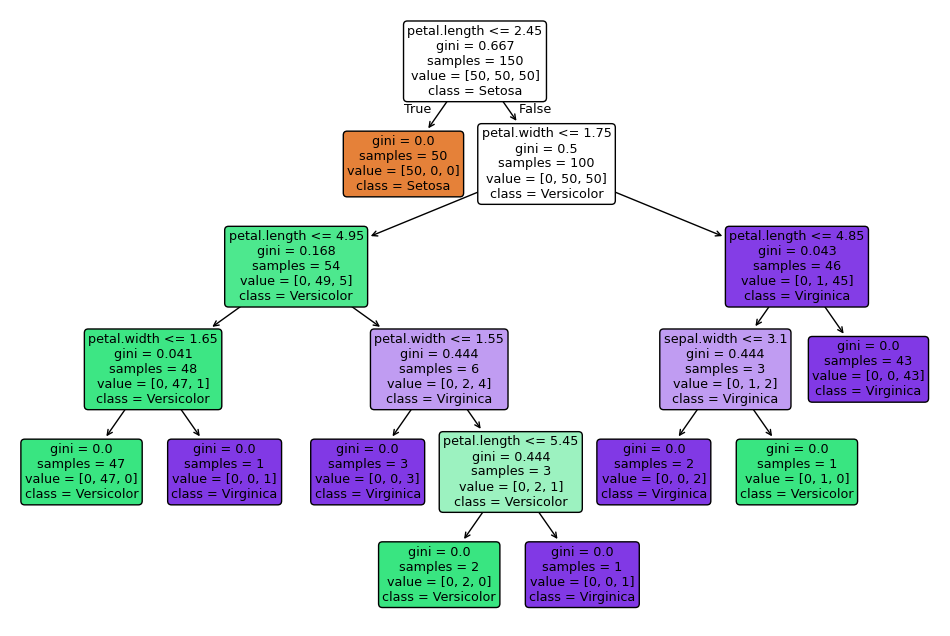

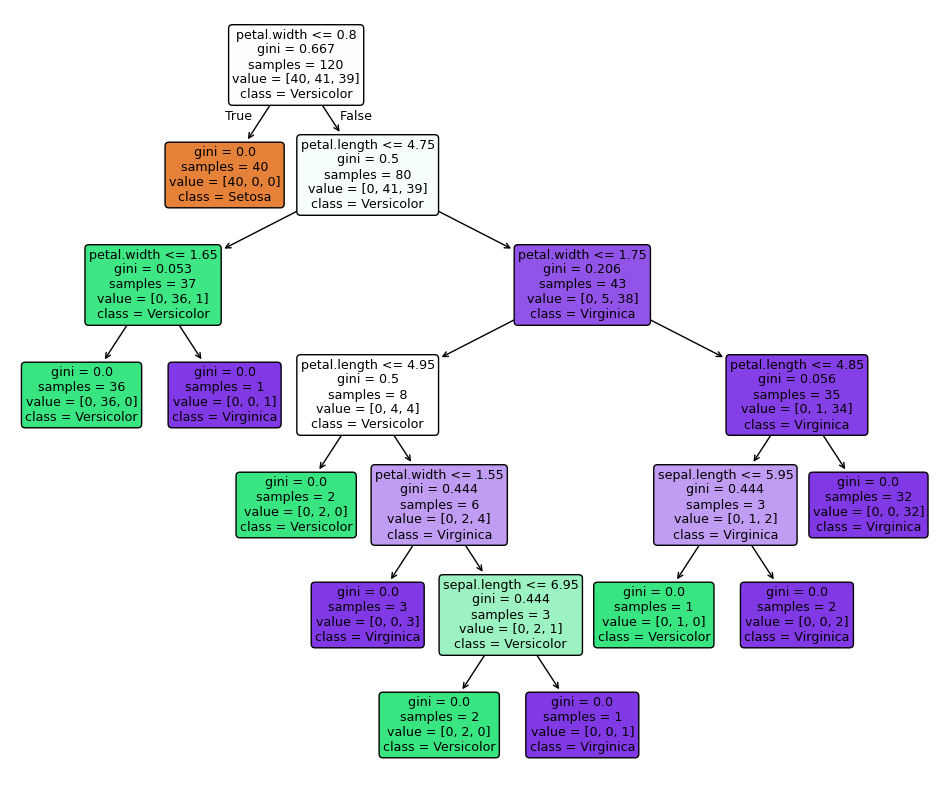

In [73]:
# Module importieren
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

# 1. Iris-Datensatz laden
df = pd.read_csv('iris.csv')
print(df.head())

# 2. Entscheidungsbaum anlegen und trainieren
feature_cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
X = df[feature_cols] # Features
y = df.variety # Target variable

#Ohne Split
blume = DecisionTreeClassifier()
blume.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(blume, feature_names=feature_cols, class_names=baum.classes_, filled=True, rounded=True)
plt.show()



#Mit Split
# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

strauss = DecisionTreeClassifier()
strauss.fit(X_train, y_train)

#y_pred = strauss.predict(X_test)

# Genauigkeit ausgeben
#print("Test Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 10))
plot_tree(strauss, feature_names=feature_cols, class_names=baum.classes_, filled=True, rounded=True)
plt.show()


# 3. Testen mit einzelnen Beispielen

